In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from matplotlib import rc
from sklearn.model_selection import train_test_split
from scipy.io.arff import loadarff
import pandas as pd
from torch import nn, optim
import torch.nn.functional as F

In [2]:
#Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


Data Preparation

In [3]:
#Reading pre-existing train and test datasets
#Adding labels to data
data_train = loadarff('ECG5000_TRAIN.arff')
df_train = pd.DataFrame(data_train[0])
df_train['target'] = df_train['target'].str.decode('utf-8') 

data_test = loadarff('ECG5000_TEST.arff')
df_test = pd.DataFrame(data_test[0])
df_test['target'] = df_test['target'].str.decode('utf-8') 

In [4]:
#Merging pre-existing train and test datasets
df_all = pd.concat([df_train, df_test], ignore_index=True)
df_all = df_all.sample(frac=1.0)
df_all.shape

(5000, 141)

In [5]:
df_all.head(10)

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
790,-1.112479,-2.463069,-3.138524,-3.828841,-4.062167,-3.926865,-3.133634,-1.783079,-1.320171,-1.246914,...,1.005445,0.546586,-0.121790,-0.468706,-1.246135,-1.568690,-1.188681,-0.480020,-1.047817,1
1764,-1.843829,-3.420062,-3.731718,-4.392105,-4.074168,-3.368026,-1.997276,-1.340718,-1.132838,-0.551914,...,1.327173,1.005606,0.293746,-0.733481,-1.311290,-1.518684,-1.171623,-0.456564,-0.932159,1
2826,0.596315,-0.793078,-2.014639,-2.960864,-3.507548,-3.782568,-3.074804,-2.144082,-1.881318,-1.646448,...,0.795034,1.319911,1.303133,1.543446,1.528603,1.508077,0.929126,0.608200,0.776455,1
4613,1.412775,0.928483,0.348615,-0.241685,-0.573094,-0.849128,-0.926474,-0.786670,-0.380873,-0.119117,...,-0.072744,-0.540630,-1.005292,-2.034524,-3.217563,-4.181011,-5.097876,-5.270293,-5.882215,3
3564,0.718831,-0.117655,-0.963799,-1.616123,-2.373174,-2.832421,-2.894568,-2.601559,-1.869103,-1.377897,...,-1.446952,-2.039035,-2.700949,-3.373855,-3.696150,-3.660498,-2.691259,-1.790878,-0.660863,2
1655,-1.259234,-2.315265,-2.429268,-2.847276,-2.700074,-2.263802,-1.584977,-1.374030,-1.164005,-0.917578,...,1.717133,1.542601,1.298430,1.076172,0.830165,0.751820,0.803126,1.071719,0.685583,1
4136,0.531618,-0.703756,-1.662568,-2.562296,-3.076932,-3.407900,-3.217690,-3.002273,-2.557595,-1.758333,...,-0.394194,-1.019297,-1.546374,-2.222391,-2.840793,-3.349450,-2.644799,-2.176969,-0.582650,2
4130,0.030046,-1.228239,-1.884448,-2.591603,-2.961698,-3.149680,-3.131022,-2.913994,-2.482143,-1.890537,...,-1.431524,-1.875884,-2.396346,-2.918888,-3.338258,-3.078163,-2.075576,-1.390661,0.214084,2
2319,1.854399,0.610322,-1.593404,-2.774550,-3.772336,-3.907035,-3.006777,-1.991411,-1.950130,-1.370978,...,-0.208845,0.258042,0.617403,0.653297,1.276243,1.547483,1.798555,1.235202,1.639822,1
1702,-0.655394,-4.108881,-4.053978,-4.590921,-3.390830,-2.168726,-1.528786,-1.217294,-0.352187,-0.028122,...,1.652368,1.619194,1.499137,0.940595,0.163029,0.124211,0.169422,1.315398,-1.702894,1


Exploratory Data Analysis

In [6]:
df_all.target.value_counts()

1    2919
2    1767
4     194
3      96
5      24
Name: target, dtype: int64

[Text(0, 0, 'Normal'),
 Text(0, 0, 'R on T'),
 Text(0, 0, 'SP'),
 Text(0, 0, 'PVC'),
 Text(0, 0, 'UB')]

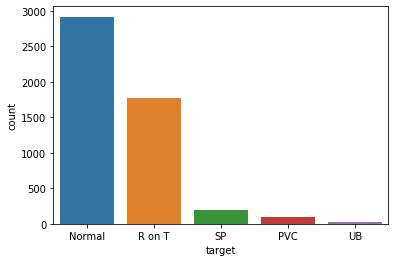

In [7]:
class_names = ['Normal','R on T','SP','PVC','UB']
ax = sns.countplot(x=df_all.target,order = df_all['target'].value_counts().index)
ax.set_xticklabels(class_names)

Text(0.5, 1.0, 'Normal')

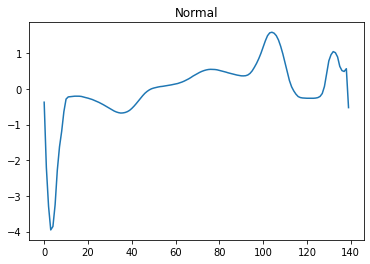

In [8]:
class_labels = {'1':'Normal','2':'R on T','3':'SP','4':'PVC','5':'UB'}
# for label in class_labels:
#   data = df_all[df_all.target == label].drop(labels='target', axis=1).mean(axis=0).to_numpy()
#   ax = axs.flat[i]
#   plt.plot(data)
#   plt.title(class_labels[label])

data = df_all[df_all.target == '1'].drop(labels='target', axis=1).mean(axis=0).to_numpy()
plt.plot(data)
plt.title('Normal')


Text(0.5, 1.0, 'R on T')

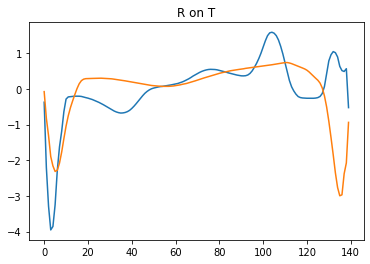

In [9]:
data = df_all[df_all.target == '1'].drop(labels='target', axis=1).mean(axis=0).to_numpy()
plt.plot(data)
plt.title('Normal')

data = df_all[df_all.target == '2'].drop(labels='target', axis=1).mean(axis=0).to_numpy()
plt.plot(data)
plt.title('R on T')

Text(0.5, 1.0, 'SP')

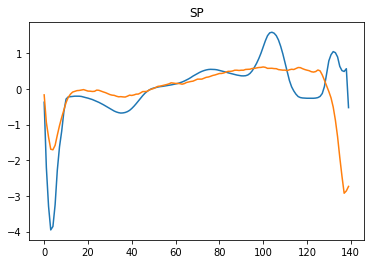

In [10]:
data = df_all[df_all.target == '1'].drop(labels='target', axis=1).mean(axis=0).to_numpy()
plt.plot(data)
plt.title('Normal')

data = df_all[df_all.target == '3'].drop(labels='target', axis=1).mean(axis=0).to_numpy()
plt.plot(data)
plt.title('SP')

Text(0.5, 1.0, 'PVC')

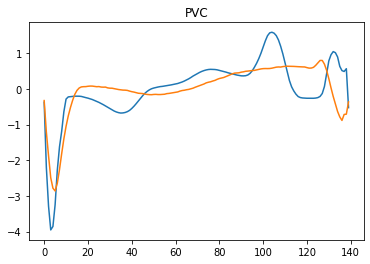

In [11]:
data = df_all[df_all.target == '1'].drop(labels='target', axis=1).mean(axis=0).to_numpy()
plt.plot(data)
plt.title('Normal')

data = df_all[df_all.target == '4'].drop(labels='target', axis=1).mean(axis=0).to_numpy()
plt.plot(data)
plt.title('PVC')

Text(0.5, 1.0, 'UB')

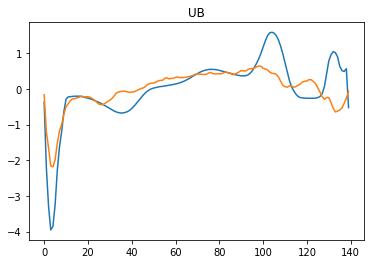

In [12]:
data = df_all[df_all.target == '1'].drop(labels='target', axis=1).mean(axis=0).to_numpy()
plt.plot(data)
plt.title('Normal')

data = df_all[df_all.target == '5'].drop(labels='target', axis=1).mean(axis=0).to_numpy()
plt.plot(data)
plt.title('UB')

Data Preprocessing

In [16]:
df_normal = df_all[df_all.target == '1'].drop(labels='target', axis=1)
df_normal.head(10)

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att131,att132,att133,att134,att135,att136,att137,att138,att139,att140
790,-1.112479,-2.463069,-3.138524,-3.828841,-4.062167,-3.926865,-3.133634,-1.783079,-1.320171,-1.246914,...,1.361144,1.005445,0.546586,-0.121790,-0.468706,-1.246135,-1.568690,-1.188681,-0.480020,-1.047817
1764,-1.843829,-3.420062,-3.731718,-4.392105,-4.074168,-3.368026,-1.997276,-1.340718,-1.132838,-0.551914,...,1.281426,1.327173,1.005606,0.293746,-0.733481,-1.311290,-1.518684,-1.171623,-0.456564,-0.932159
2826,0.596315,-0.793078,-2.014639,-2.960864,-3.507548,-3.782568,-3.074804,-2.144082,-1.881318,-1.646448,...,0.420598,0.795034,1.319911,1.303133,1.543446,1.528603,1.508077,0.929126,0.608200,0.776455
1655,-1.259234,-2.315265,-2.429268,-2.847276,-2.700074,-2.263802,-1.584977,-1.374030,-1.164005,-0.917578,...,1.834101,1.717133,1.542601,1.298430,1.076172,0.830165,0.751820,0.803126,1.071719,0.685583
2319,1.854399,0.610322,-1.593404,-2.774550,-3.772336,-3.907035,-3.006777,-1.991411,-1.950130,-1.370978,...,-0.203655,-0.208845,0.258042,0.617403,0.653297,1.276243,1.547483,1.798555,1.235202,1.639822
1702,-0.655394,-4.108881,-4.053978,-4.590921,-3.390830,-2.168726,-1.528786,-1.217294,-0.352187,-0.028122,...,1.004234,1.652368,1.619194,1.499137,0.940595,0.163029,0.124211,0.169422,1.315398,-1.702894
2528,-1.607870,-3.457563,-4.156871,-4.240131,-3.529517,-2.611766,-1.788220,-1.571302,-1.175782,-0.571316,...,1.235015,1.180263,1.381094,1.669408,1.597035,1.010819,0.648257,0.722491,0.867290,-0.391700
903,-0.958899,-2.822721,-4.099822,-4.226017,-3.581672,-2.820932,-1.866468,-1.713717,-1.306772,-0.754600,...,1.332268,1.330088,1.422116,1.340971,1.259349,1.317357,1.784941,1.881716,1.157349,-0.942972
1295,-1.417907,-3.645657,-4.258332,-4.248502,-3.090378,-2.375027,-1.860673,-1.236243,-0.572653,-0.480635,...,0.295724,0.956771,1.099388,0.859155,0.829118,0.591398,0.490406,0.320582,1.142243,0.799771
1259,1.019458,-1.560096,-3.629091,-4.441168,-4.130532,-3.540186,-2.365194,-1.440494,-1.335403,-0.536569,...,1.048259,0.903678,1.187233,1.480749,1.543320,1.246985,1.201683,1.675628,2.005034,-0.135970


In [17]:
df_anomaly = df_all[df_all.target != '1'].drop(labels='target', axis=1)
df_anomaly.head(10)

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att131,att132,att133,att134,att135,att136,att137,att138,att139,att140
4613,1.412775,0.928483,0.348615,-0.241685,-0.573094,-0.849128,-0.926474,-0.786670,-0.380873,-0.119117,...,0.269514,-0.072744,-0.540630,-1.005292,-2.034524,-3.217563,-4.181011,-5.097876,-5.270293,-5.882215
3564,0.718831,-0.117655,-0.963799,-1.616123,-2.373174,-2.832421,-2.894568,-2.601559,-1.869103,-1.377897,...,-0.863971,-1.446952,-2.039035,-2.700949,-3.373855,-3.696150,-3.660498,-2.691259,-1.790878,-0.660863
4136,0.531618,-0.703756,-1.662568,-2.562296,-3.076932,-3.407900,-3.217690,-3.002273,-2.557595,-1.758333,...,0.096997,-0.394194,-1.019297,-1.546374,-2.222391,-2.840793,-3.349450,-2.644799,-2.176969,-0.582650
4130,0.030046,-1.228239,-1.884448,-2.591603,-2.961698,-3.149680,-3.131022,-2.913994,-2.482143,-1.890537,...,-0.838475,-1.431524,-1.875884,-2.396346,-2.918888,-3.338258,-3.078163,-2.075576,-1.390661,0.214084
4550,0.703059,0.397482,-0.189764,-0.605791,-0.788513,-1.033614,-1.096051,-0.876787,-0.564659,-0.414430,...,-0.000141,-0.308780,-0.686247,-1.092139,-2.007243,-3.048552,-3.988295,-5.151474,-5.650688,-5.594128
3907,0.034284,-0.804537,-1.364302,-2.105578,-2.381817,-2.847642,-3.049109,-2.990850,-2.779838,-2.196007,...,-2.173865,-2.706327,-3.287082,-3.470843,-2.902573,-2.226431,-1.237604,-0.170314,-0.294953,0.527546
3672,-4.375058,-5.502203,-3.684463,-1.547087,-0.826054,-1.069644,-1.036794,-0.469865,0.012616,0.013911,...,1.515031,1.358877,1.112695,1.191920,1.461003,1.252962,0.477718,0.171800,1.517776,4.272672
451,0.731092,0.391837,0.023516,-0.441061,-0.655570,-0.842648,-1.068942,-1.285449,-1.401474,-1.338475,...,-1.694371,-2.105908,-2.635502,-3.169802,-3.317600,-3.739082,-4.120702,-3.895981,-3.927518,-1.866217
3651,-1.112897,-1.692356,-1.686848,-2.040025,-2.165253,-2.102514,-2.068605,-1.912395,-1.750152,-1.503442,...,-1.726438,-2.253860,-2.997674,-3.585525,-3.841420,-3.854247,-3.124407,-2.213970,-1.848502,-0.621925
381,2.097629,1.336423,0.099275,-0.695088,-1.828747,-2.487004,-2.515481,-2.379960,-1.989007,-1.560988,...,-2.950449,-3.136941,-3.210991,-3.196321,-3.045003,-2.531029,-1.688519,-0.625863,0.502430,0.886104


In [18]:
df_train, df_val = train_test_split(df_normal, test_size=0.3, random_state=0)
df_val, df_test = train_test_split(df_val, test_size=0.5, random_state=0)

In [19]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(2043, 140)
(438, 140)
(438, 140)


In [ ]:
#Saving datasets as csv files 
df_train.to_csv('training_data')
df_val.to_csv('validation_data')
df_test.to_csv('test_data')
df_anomaly.to_csv('anomaly_data')
df_all.to_csv('ECG_dataset')